In [147]:
import pandas as pd
import seaborn as sns

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

In [148]:
cv = pd.read_csv("costumer_segmentation.csv")
cv.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [149]:
cv.drop(columns = ["ID", "Work_Experience", "Var_1"], inplace = True)
cv.dropna(inplace = True)
cv

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,Female,Yes,36,Yes,Engineer,Low,1.0,B
1,Male,Yes,37,Yes,Healthcare,Average,4.0,A
3,Male,Yes,59,No,Executive,High,2.0,B
4,Female,No,19,No,Marketing,Low,4.0,A
5,Male,Yes,47,Yes,Doctor,High,5.0,C
...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,Low,4.0,B
2623,Female,No,35,Yes,Doctor,Low,1.0,A
2624,Female,No,53,Yes,Entertainment,Low,2.0,C
2625,Male,Yes,47,Yes,Executive,High,5.0,C


In [150]:
le = preprocessing.LabelEncoder()
le.fit(cv["Gender"])
cv["Gender"] = le.transform(cv["Gender"])
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)

{'Female': 0, 'Male': 1}


In [151]:
le.fit(cv["Ever_Married"])
cv["Ever_Married"] = le.transform(cv["Ever_Married"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'No': 0, 'Yes': 1}


In [152]:
le.fit(cv["Graduated"])
cv["Graduated"] = le.transform(cv["Graduated"])
graduated_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(graduated_labels)

{'No': 0, 'Yes': 1}


In [153]:
le.fit(cv["Profession"])
cv["Profession"] = le.transform(cv["Profession"])
profession_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(profession_labels)

{'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8}


In [154]:
le.fit(cv["Spending_Score"])
cv["Spending_Score"] = le.transform(cv["Spending_Score"])
spending_score_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(spending_score_labels)

{'Average': 0, 'High': 1, 'Low': 2}


In [155]:
le.fit(cv["Segmentation"])
cv["Segmentation"] = le.transform(cv["Segmentation"])
segmentation_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(segmentation_labels)

{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [156]:
cv

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,0,1,36,1,2,2,1.0,1
1,1,1,37,1,5,0,4.0,0
3,1,1,59,0,4,1,2.0,1
4,0,0,19,0,8,2,4.0,0
5,1,1,47,1,1,1,5.0,2
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,2,4.0,1
2623,0,0,35,1,1,2,1.0,0
2624,0,0,53,1,3,2,2.0,2
2625,1,1,47,1,4,1,5.0,2


In [157]:
X = cv.iloc[:,:7]
X

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,0,1,36,1,2,2,1.0
1,1,1,37,1,5,0,4.0
3,1,1,59,0,4,1,2.0
4,0,0,19,0,8,2,4.0
5,1,1,47,1,1,1,5.0
...,...,...,...,...,...,...,...
2622,1,0,29,0,5,2,4.0
2623,0,0,35,1,1,2,1.0
2624,0,0,53,1,3,2,2.0
2625,1,1,47,1,4,1,5.0


In [158]:
Y = cv.iloc[:,7]
Y

0       1
1       0
3       1
4       0
5       2
       ..
2622    1
2623    0
2624    2
2625    2
2626    0
Name: Segmentation, Length: 2410, dtype: int32

In [159]:
cv

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,0,1,36,1,2,2,1.0,1
1,1,1,37,1,5,0,4.0,0
3,1,1,59,0,4,1,2.0,1
4,0,0,19,0,8,2,4.0,0
5,1,1,47,1,1,1,5.0,2
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,2,4.0,1
2623,0,0,35,1,1,2,1.0,0
2624,0,0,53,1,3,2,2.0,2
2625,1,1,47,1,4,1,5.0,2


In [160]:
#just test || data manipulation move columns
#column_to_move = cv.pop("Segmentation")
#cv.insert(0, "Segmentation", column_to_move)

In [161]:
#just test
#cv["Rich"] = ((cv["Profession"] + cv["Spending_Score"].apply(lambda x : 1 if x == 0 else 0)))
#cv

<AxesSubplot:xlabel='Family_Size', ylabel='Segmentation'>

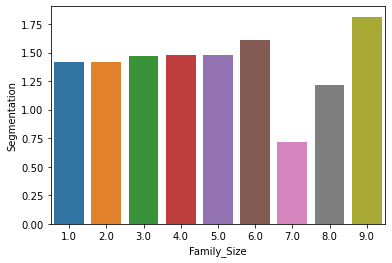

In [162]:
sns.barplot(x = "Family_Size", y = "Segmentation", data = cv, ci = None)

<AxesSubplot:xlabel='Spending_Score', ylabel='Segmentation'>

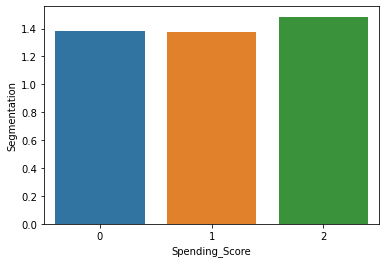

In [163]:
sns.barplot(x = "Spending_Score", y = "Segmentation", data = cv, ci = None)

<AxesSubplot:xlabel='Profession', ylabel='Segmentation'>

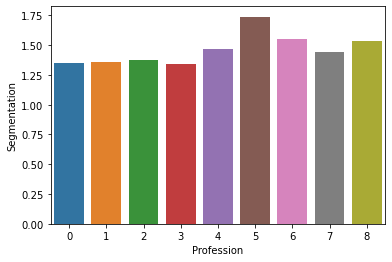

In [164]:
sns.barplot(x = "Profession", y = "Segmentation", data = cv, ci = None)

[Text(0, 0, 'Not Graduated'), Text(1, 0, 'Graduated')]

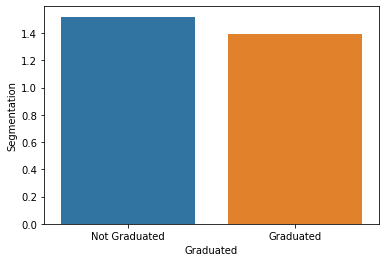

In [165]:
ax = sns.barplot(x = "Graduated", y = "Segmentation", data = cv, ci = None)
ax.set_xticklabels(["Not Graduated", "Graduated"])

In [171]:
#Filter Method -> Chi Square

bestfeatures = SelectKBest(score_func = chi2, k = 7)
fit = bestfeatures.fit(X,Y)
cvscores = pd.DataFrame(fit.scores_)
cvcolumns = pd.DataFrame(X.columns)

featureScore = pd.concat([cvcolumns, cvscores], axis = 1)
featureScore.columns = ['Attr', 'Score']
print(featureScore.nlargest(7,'Score'))

             Attr       Score
2             Age  805.217012
4      Profession   69.677842
1    Ever_Married   32.974059
5  Spending_Score   22.626155
6     Family_Size   15.641988
3       Graduated   13.137486
0          Gender    1.228632


In [174]:
#Wrapp Method -> RFE

model = LogisticRegression()
rfe = RFE(model, step = 7)
fit = rfe.fit(X,Y)

print("Num Features %s" %(fit.n_features_))
print("Selected Features : %s" %(fit.support_))
print("Feature Ranking : %s" %(fit.ranking_))

cvscores = pd.DataFrame(fit.support_)
cvcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([cvcolumns, cvscores], axis = 1)
featureScores.columns = ["Attr", "Score"]
print(featureScores.nlargest(7,"Score"))

Num Features 3
Selected Features : [ True  True False False False  True False]
Feature Ranking : [1 1 2 2 2 1 2]
             Attr  Score
0          Gender   True
1    Ever_Married   True
5  Spending_Score   True
2             Age  False
3       Graduated  False
4      Profession  False
6     Family_Size  False


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
#Embedded Method

ridge = Ridge(alpha = 1.0)
ridge.fit(X,Y)
print(ridge.coef_)

def pretty_print_coefs(coefs, names = None, sort = False) :
    if names == None :
        names = ["X-%s" % x for x in X.columns]
    print(names)
    lst = zip(coefs, names)
    if sort :
        lst = sorted(lst, key = lambda x : -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                     for coef, name in lst)
print("Ridge model : ", pretty_print_coefs(ridge.coef_))

[-0.01673377 -0.1043076  -0.00464363 -0.02744275  0.03742001 -0.03748101
 -0.01754726]
['X-Gender', 'X-Ever_Married', 'X-Age', 'X-Graduated', 'X-Profession', 'X-Spending_Score', 'X-Family_Size']
Ridge model :  -0.017 * X-Gender + -0.104 * X-Ever_Married + -0.005 * X-Age + -0.027 * X-Graduated + 0.037 * X-Profession + -0.037 * X-Spending_Score + -0.018 * X-Family_Size
